CSCI-GA.3033-​076 Vision Meets Machine Learning Assignment-2

In this assignment, you will train the Resnet18 classifier on the CIFAR-10 dataset and do the statistical analysis of the classification. 

Submission Info

You should make a copy of this Colab (File->Save a copy in Drive). Please start the assignment early and don’t be afraid to ask for help from either the TAs or myself. You are allowed to collaborate with other students in terms discussing ideas and possible solutions. However you code up the solution yourself, i.e. you must write your own code. Copying your friends code and just changing all the names of the variables is not allowed! You are not allowed to use solutions from similar assignments in courses from other institutions, or those found elsewhere on the web. Your solutions should be submitted via the NYU classes system.

# **Part 1- Training The Resnet classifier (40 Points)**

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim

In [3]:
# The CIFAR-10 dataset is available in the pytorch module.
#  http://www.cs.toronto.edu/~kriz/cifar.html
# Only normalization tranformation is applied. You can choose to apply data augmentation techniques as well.

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

#Loading the training data
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

#Loading the testing data
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')




Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [4]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


**Question - 1. Show any 4 random images from the dataset.(10 Points)**

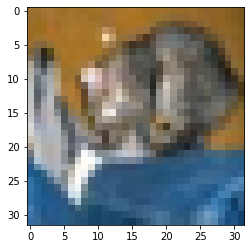

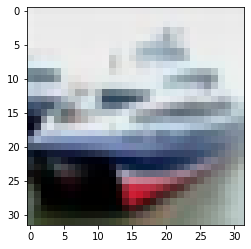

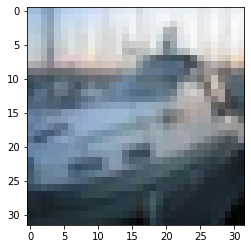

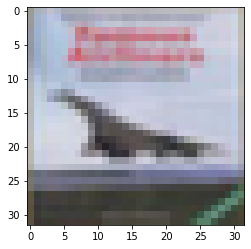

In [5]:
#image = trainset(root = './data')
image = testloader
batch_x, batch_y = next(iter(testloader))
image = batch_x[0][0].reshape(32,32)
#image = image.fromarray(image)
next(iter(testloader))

#print(next(iter(testloader)))
for i in range(4):
  imshow(next(iter(testloader))[0][i])

In [6]:
# Using the GPU available on the google colab
if torch.cuda.device_count() > 0:
    current_device = 'cuda'
else:
    current_device = 'cpu'
print('Current Device: ' + current_device)

Current Device: cuda


In [7]:
# Intiating the Resnet18 model from the torch module. Setting pretrained = False because we're training it from the scratch
net = models.resnet18(pretrained= False)
num_classes = 10

**Question-2. The Resnet18 model intialized here contains 1000 output classes change it to 10 classes in the model.(10 Points)**

In [8]:

torchvision.models.resnet18(pretrained = False).fc.num_classes = 10

#torchvision.models.resnet18(pretrained=False, progress=True, **kwargs)
##https://discuss.pytorch.org/t/changing-in-features-in-fc-layer-for-resnet18-in-torchvision/21445/2
#resnet18 = torchvision.models.resnet18(pretrained = False)
#resnet18.fc.out_features = 10
#torchvision.models.resnet18(pretrained = False).fc.out_features = 10

In [ ]:
#Model training

net = net.to(current_device)


criterion = nn.CrossEntropyLoss()
#You can expermient with different lr and momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20

for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        inputs = inputs.to(current_device)
        labels = labels.to(current_device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

**Question-3. (i).Plot the loss with epoch for lr = [10, 1, 0.1, 0.01, 0.001] and make comments about how high lr effects the training. (20 Points)**

We train the model using different lr. And we repeat the program four times. 

The loss 1.9357 of 0.0th epoch
The loss 1.5037 of 1.0th epoch
The loss 1.2627 of 2.0th epoch
The loss 1.1062 of 3.0th epoch
The loss 1.0000 of 4.0th epoch
The loss 0.8982 of 5.0th epoch
The loss 0.8203 of 6.0th epoch
The loss 0.7468 of 7.0th epoch
The loss 0.6843 of 8.0th epoch
The loss 0.6287 of 9.0th epoch
The loss 0.5727 of 10.0th epoch
The loss 0.5543 of 11.0th epoch
The loss 0.5758 of 12.0th epoch
The loss 0.4657 of 13.0th epoch
The loss 0.4066 of 14.0th epoch
The loss 0.3518 of 15.0th epoch
The loss 0.3235 of 16.0th epoch
The loss 0.2926 of 17.0th epoch
The loss 0.2604 of 18.0th epoch
The loss 0.2358 of 19.0th epoch
Finished Training
y_1 [1.935743842713833, 1.503655087788105, 1.262741921892166, 1.1061719396439196, 1.0000448625150322, 0.8982223949119449, 0.8203420413383842, 0.7468395712598414, 0.6842967488002032, 0.6287334252687916, 0.5726697312675976, 0.55432781459135, 0.5757755493981856, 0.46573089539634993, 0.40664581521577203, 0.35182867714421356, 0.3235348356577242, 0.2925598

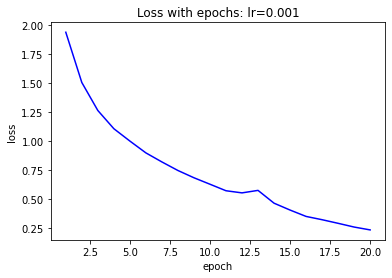

In [ ]:
#plot with lr=0.001

net = net.to(current_device)

criterion = nn.CrossEntropyLoss()
#You can expermient with different lr and momentum
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

num_epochs = 20
y_1=[]
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #data is tensor format
        data_temp = data

        inputs = inputs.to(current_device)
        labels = labels.to(current_device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        rs=running_loss/len(trainloader)

    y_1.append(rs)
    print("The loss {:.4f} of {:.1f}th epoch".format(rs,epoch))

print('Finished Training') 


print('y_1',y_1)
x_1=[i+1 for i in range(num_epochs)]
plt.plot(x_1, y_1, color = 'blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss with epochs: lr={:.3f}'.format(0.001))
plt.show()


The loss 2.3126 of 0.0th epoch
The loss 1.9720 of 1.0th epoch
The loss 1.8515 of 2.0th epoch
The loss 1.7777 of 3.0th epoch
The loss 1.6526 of 4.0th epoch
The loss 1.6123 of 5.0th epoch
The loss 1.5289 of 6.0th epoch
The loss 1.4463 of 7.0th epoch
The loss 1.4170 of 8.0th epoch
The loss 1.3634 of 9.0th epoch
The loss 1.3734 of 10.0th epoch
The loss 1.3484 of 11.0th epoch
The loss 1.3028 of 12.0th epoch
The loss 1.2432 of 13.0th epoch
The loss 1.1901 of 14.0th epoch
The loss 1.3714 of 15.0th epoch
The loss 1.2776 of 16.0th epoch
The loss 1.2040 of 17.0th epoch
The loss 1.1780 of 18.0th epoch
The loss 1.1304 of 19.0th epoch
Finished Training
y_1 [2.312605395245552, 1.9720034878587722, 1.8515487823200225, 1.777710061006546, 1.652575764708519, 1.612315335521698, 1.528870874004364, 1.446331008478999, 1.416986025300026, 1.3633770499438047, 1.3733597325110436, 1.3483911937600375, 1.3028378129804135, 1.243178111949861, 1.190117179442048, 1.3713968524640798, 1.2775616984584928, 1.20397069228559

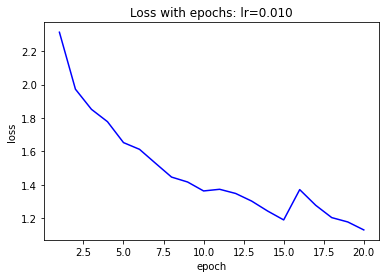

In [ ]:
#plot with lr=0.01

net = net.to(current_device)

criterion = nn.CrossEntropyLoss()
#You can expermient with different lr and momentum
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

num_epochs = 20
y_1=[]
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #data is tensor format
        data_temp = data

        inputs = inputs.to(current_device)
        labels = labels.to(current_device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        rs=running_loss/len(trainloader)

    y_1.append(rs)
    print("The loss {:.4f} of {:.1f}th epoch".format(rs,epoch))

print('Finished Training') 


print('y_1',y_1)
x_1=[i+1 for i in range(num_epochs)]
plt.plot(x_1, y_1, color = 'blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss with epochs: lr={:.3f}'.format(0.01))
plt.show()


The loss 2.4306 of 0.0th epoch
The loss 2.3604 of 1.0th epoch
The loss 2.3588 of 2.0th epoch
The loss 2.3600 of 3.0th epoch
The loss 2.3599 of 4.0th epoch
The loss 2.3612 of 5.0th epoch
The loss 2.3613 of 6.0th epoch
The loss 2.3614 of 7.0th epoch
The loss 2.3616 of 8.0th epoch
The loss 2.3610 of 9.0th epoch
The loss 2.3614 of 10.0th epoch
The loss 2.3613 of 11.0th epoch
The loss 2.3606 of 12.0th epoch
The loss 2.3601 of 13.0th epoch
The loss 2.3593 of 14.0th epoch
The loss 2.3600 of 15.0th epoch
The loss 2.3597 of 16.0th epoch
The loss 2.3601 of 17.0th epoch
The loss 2.3611 of 18.0th epoch
The loss 2.3591 of 19.0th epoch
Finished Training
y_1 [2.430642212381363, 2.360353970499039, 2.3587818896770476, 2.3600145591259003, 2.359878033399582, 2.361228839969635, 2.361331450099945, 2.3613592383384705, 2.3616038881015777, 2.3609536876010893, 2.3614098946094515, 2.361262257089615, 2.3605912211322786, 2.360051786689758, 2.3592517997455595, 2.360007543449402, 2.359678150615692, 2.36012989908218

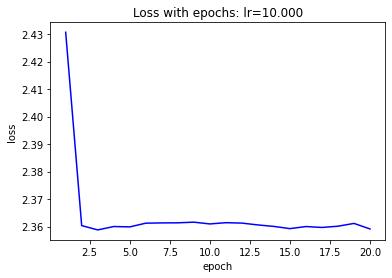

In [8]:
#plot with lr=0.1

net = net.to(current_device)

criterion = nn.CrossEntropyLoss()
#You can expermient with different lr and momentum
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

num_epochs = 20
y_1=[]
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #data is tensor format
        data_temp = data

        inputs = inputs.to(current_device)
        labels = labels.to(current_device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        rs=running_loss/len(trainloader)

    y_1.append(rs)
    print("The loss {:.4f} of {:.1f}th epoch".format(rs,epoch))

print('Finished Training') 


print('y_1',y_1)
x_1=[i+1 for i in range(num_epochs)]
plt.plot(x_1, y_1, color = 'blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss with epochs: lr={:.3f}'.format(10))
plt.show()


The loss nan of 0.0th epoch
The loss nan of 1.0th epoch
The loss nan of 2.0th epoch
The loss nan of 3.0th epoch
The loss nan of 4.0th epoch
The loss nan of 5.0th epoch
The loss nan of 6.0th epoch
The loss nan of 7.0th epoch
The loss nan of 8.0th epoch
The loss nan of 9.0th epoch
The loss nan of 10.0th epoch
The loss nan of 11.0th epoch
The loss nan of 12.0th epoch
The loss nan of 13.0th epoch
The loss nan of 14.0th epoch
The loss nan of 15.0th epoch
The loss nan of 16.0th epoch
The loss nan of 17.0th epoch
The loss nan of 18.0th epoch
The loss nan of 19.0th epoch
Finished Training
y_1 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


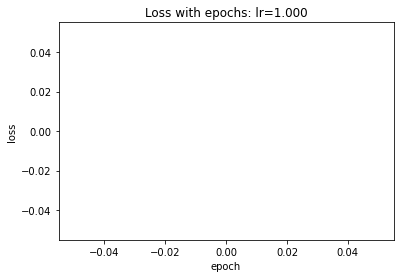

In [ ]:
#plot with lr=1

net = net.to(current_device)

criterion = nn.CrossEntropyLoss()
#You can expermient with different lr and momentum
optimizer = optim.SGD(net.parameters(), lr=1, momentum=0.9)

num_epochs = 20
y_1=[]
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #data is tensor format
        data_temp = data

        inputs = inputs.to(current_device)
        labels = labels.to(current_device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        rs=running_loss/len(trainloader)

    y_1.append(rs)
    print("The loss {:.4f} of {:.1f}th epoch".format(rs,epoch))

print('Finished Training') 


print('y_1',y_1)
x_1=[i+1 for i in range(num_epochs)]
plt.plot(x_1, y_1, color = 'blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss with epochs: lr={:.3f}'.format(1))
plt.show()


The loss nan of 0.0th epoch
The loss nan of 1.0th epoch
The loss nan of 2.0th epoch
The loss nan of 3.0th epoch
The loss nan of 4.0th epoch
The loss nan of 5.0th epoch
The loss nan of 6.0th epoch
The loss nan of 7.0th epoch
The loss nan of 8.0th epoch
The loss nan of 9.0th epoch
The loss nan of 10.0th epoch
The loss nan of 11.0th epoch
The loss nan of 12.0th epoch
The loss nan of 13.0th epoch
The loss nan of 14.0th epoch
The loss nan of 15.0th epoch
The loss nan of 16.0th epoch
The loss nan of 17.0th epoch
The loss nan of 18.0th epoch
The loss nan of 19.0th epoch
Finished Training
y_1 [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


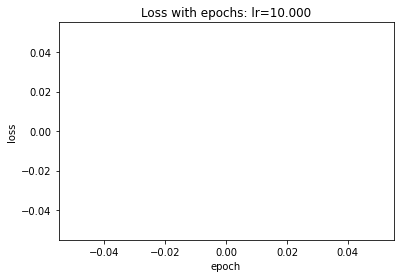

In [ ]:
#plot with lr=10

net = net.to(current_device)

criterion = nn.CrossEntropyLoss()
#You can expermient with different lr and momentum
optimizer = optim.SGD(net.parameters(), lr=10, momentum=0.9)

num_epochs = 20
y_1=[]
for epoch in range(num_epochs):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        #data is tensor format
        data_temp = data

        inputs = inputs.to(current_device)
        labels = labels.to(current_device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        
        rs=running_loss/len(trainloader)

    y_1.append(rs)
    print("The loss {:.4f} of {:.1f}th epoch".format(rs,epoch))

print('Finished Training') 


print('y_1',y_1)
x_1=[i+1 for i in range(num_epochs)]
plt.plot(x_1, y_1, color = 'blue')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('Loss with epochs: lr={:.3f}'.format(10))
plt.show()


Lr has a great influence on loss function. When Lr = 0.01, loss decreased steadily with epoch. When Lr = 0.1, loss will increase in the middle of the process and then decrease steadily. If Lr is large, such as Lr = 10 and  Lr = 1, the convergence solution can not even be obtained. 

In [ ]:
#Testing the model
correct = 0
total = 0
i=0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images.to(current_device))
        labels = labels.to(current_device)
        _, predicted = torch.max(outputs.data, 1)
        print(predicted,i+1)
        total += labels.size(0)
        correct += (predicted != labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

## **Part - 2 (20 Points)**

Question-1. Calculate the confusion matrix of the classifcation. (10 Points)

Question-2. Calculate the Precision, Recall and F1-score for each class. (10 Points)

(Hint - You can find this article useful - https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826) 

In [ ]:
#Compute the confusion matrix of the classification and the Precision, Recall and F1-score for each class
nb_classes = 10
confusion_matrix = torch.zeros(nb_classes, nb_classes)
with torch.no_grad():
    for i, (inputs, classes) in enumerate(testloader):
        inputs = inputs.to(current_device)
        classes = classes.to(current_device)
        outputs = net(inputs.to(current_device))
        _, preds = torch.max(outputs, 1)
        for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion_matrix[t.long(), p.long()] += 1

print("The confusion maatrix:",confusion_matrix)


# To get the per-class recall:
recal=confusion_matrix.diag()/confusion_matrix.sum(0)
print("The per-call recall:",recal)

# To get the per-class accuracy:
accura=confusion_matrix.diag()/confusion_matrix.sum(1)
print("The per-class accuracy:", accura)

#To ger the F1-score
F1_score=2*recal* accura/(recal+accura)
print("The F1-scor:", F1_score)



The confusion maatrix: tensor([[634.,  22.,  13.,   6.,  49.,   5.,  25.,  31., 167.,  48.],
        [ 57., 397.,   0.,   5.,  15.,   2.,  90.,  16., 154., 264.],
        [207.,  18., 120.,  56., 279.,  57., 123.,  89.,  27.,  24.],
        [ 96.,   8.,  24., 156., 136., 108., 297.,  93.,  43.,  39.],
        [104.,   5.,  36.,  33., 474.,  28., 150., 133.,  23.,  14.],
        [ 74.,   9.,  42., 158., 123., 210., 152., 177.,  35.,  20.],
        [ 36.,  10.,  11.,  36., 202.,  15., 595.,  34.,  21.,  40.],
        [ 69.,   5.,  14.,  27., 127.,  45.,  76., 577.,  11.,  49.],
        [191.,  38.,   4.,  12.,  28.,   6.,  29.,  17., 627.,  48.],
        [ 65.,  87.,   3.,  11.,  19.,  11.,  98.,  39., 189., 478.]])
The per-call recall: tensor([0.4136, 0.6628, 0.4494, 0.3120, 0.3264, 0.4312, 0.3639, 0.4784, 0.4834,
        0.4668])
The per-class accuracy: tensor([0.6340, 0.3970, 0.1200, 0.1560, 0.4740, 0.2100, 0.5950, 0.5770, 0.6270,
        0.4780])
The F1-scor: tensor([0.5006, 0.4966, 